In [1]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Models")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Models/SD_Unet")
import sd_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'sd_unet_30ep_512_fG'
INPUT_SHAPE = (512, 512, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Models/SD_Unet/model_parameters/" + FILE_NAME + ".h5"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Models/SD_Unet/history/" + FILE_NAME + '_history' ".json"
SOURCE = '/visuworks/Dataset/Selected Dataset 2'

2024-01-26 13:07:49.261386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 13:07:49.261416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 13:07:49.262454: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 13:07:49.267469: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-26 13:07:49.856628: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'DropBlock2D': sd_unet.DropBlock2D}

# Create augmentation
# FullSizedDataGenerator & SlicedDataGenerator -> build_augmentation_for_general
# AdaptiveDataGenerator -> build_augmentation_for_adaptive
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0],is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=4, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=4, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = sd_unet.SD_UNet(INPUT_SHAPE)
model.summary()

2024-01-26 11:27:12.582864: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-26 11:27:12.617051: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-26 11:27:12.617271: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 8)          80        ['input_1[0][0]']             
                                                                                                  
 drop_block2d (DropBlock2D)  (None, 512, 512, 8)          524288    ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 512, 512, 8)          0         ['drop_block2d[0][0]']        
                                                                                              

In [3]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
2024-01-26 11:27:17.614974: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-26 11:27:19.278200: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ef9226d0ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-26 11:27:19.278220: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-01-26 11:27:19.281624: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706268439.355364  535581 device_compiler.h:186] Compil

295/295 [==============================] - ETA: 0s - loss: 0.7205 - sensitivity: 0.0037 - specificity: 0.9980 - accuracy: 0.9290
Epoch 1: val_sensitivity improved from -inf to 0.00000, saving model to /visuworks/Blindless_AIFFELTON/Models/SD_Unet/model_parameters/sd_unet_30ep_512_aG.h5
295/295 [==============================] - 142s 444ms/step - loss: 0.7205 - sensitivity: 0.0037 - specificity: 0.9980 - accuracy: 0.9290 - val_loss: 0.7249 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000 - val_accuracy: 0.9298
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


295/295 [==============================] - ETA: 0s - loss: 0.6266 - sensitivity: 0.1648 - specificity: 0.9829 - accuracy: 0.9262
Epoch 2: val_sensitivity improved from 0.00000 to 0.43600, saving model to /visuworks/Blindless_AIFFELTON/Models/SD_Unet/model_parameters/sd_unet_30ep_512_aG.h5
295/295 [==============================] - 128s 432ms/step - loss: 0.6266 - sensitivity: 0.1648 - specificity: 0.9829 - accuracy: 0.9262 - val_loss: 0.4940 - val_sensitivity: 0.4360 - val_specificity: 0.9750 - val_accuracy: 0.9375
Epoch 3/30
295/295 [==============================] - ETA: 0s - loss: 0.4846 - sensitivity: 0.4934 - specificity: 0.9580 - accuracy: 0.9261
Epoch 3: val_sensitivity improved from 0.43600 to 0.53151, saving model to /visuworks/Blindless_AIFFELTON/Models/SD_Unet/model_parameters/sd_unet_30ep_512_aG.h5
295/295 [==============================] - 128s 435ms/step - loss: 0.4846 - sensitivity: 0.4934 - specificity: 0.9580 - accuracy: 0.9261 - val_loss: 0.3876 - val_sensitivity: 0.5

125/125 [==============================] - 38s 304ms/step - loss: 0.2310 - sensitivity: 0.7998 - specificity: 0.9720 - accuracy: 0.9602
Loss: 0.230968177318573
Sensitivity: 0.7997793555259705
Specificity: 0.9719788432121277
Accuracy: 0.9602144956588745


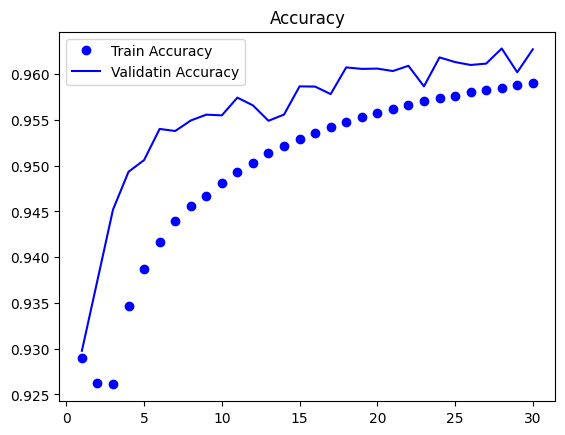

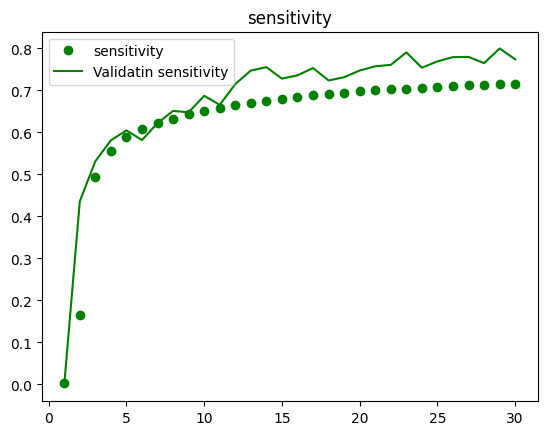

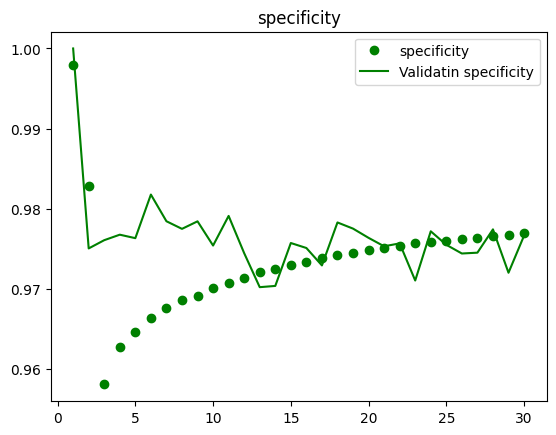

<Figure size 640x480 with 0 Axes>

In [4]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot history and pring evaluation of test dataset
metrics.print_evaluation(model, test_generator)
check_result.plot_history(HISTORY_PATH)

2024-01-26 13:07:55.736435: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-26 13:07:55.769831: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-26 13:07:55.770078: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

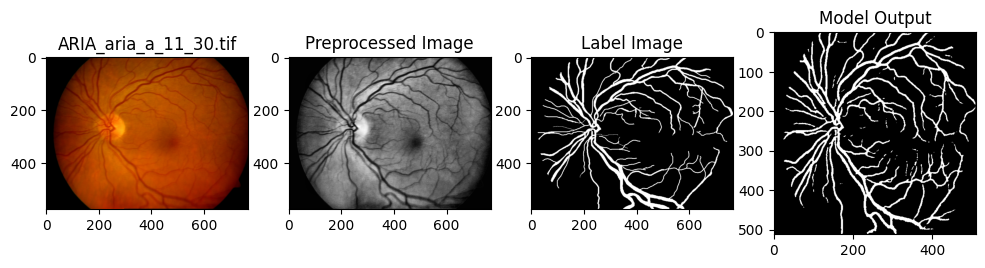

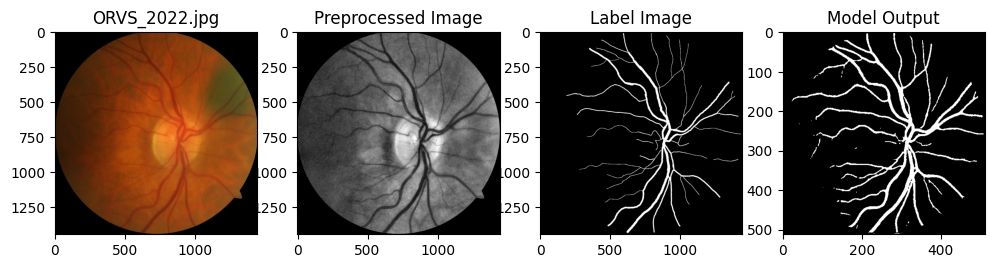

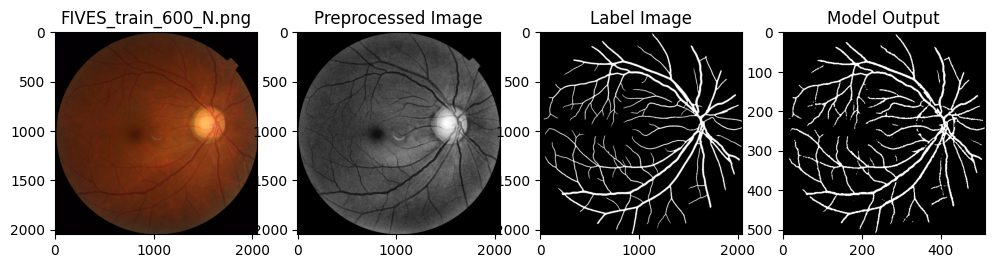

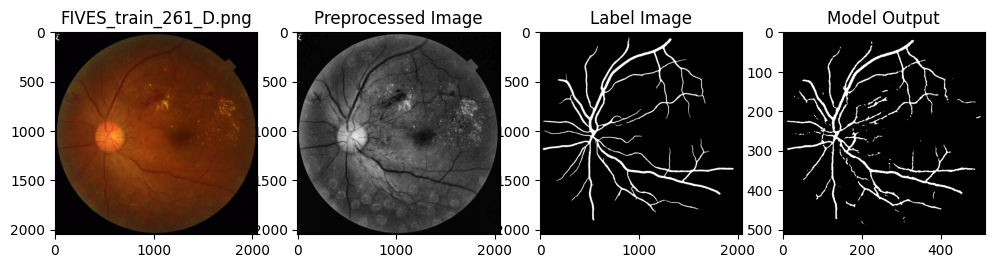

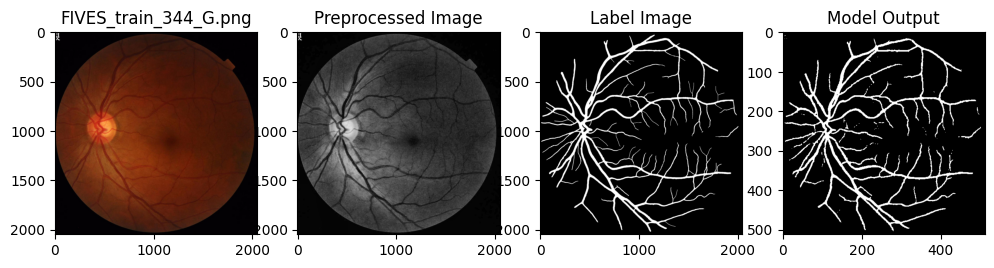

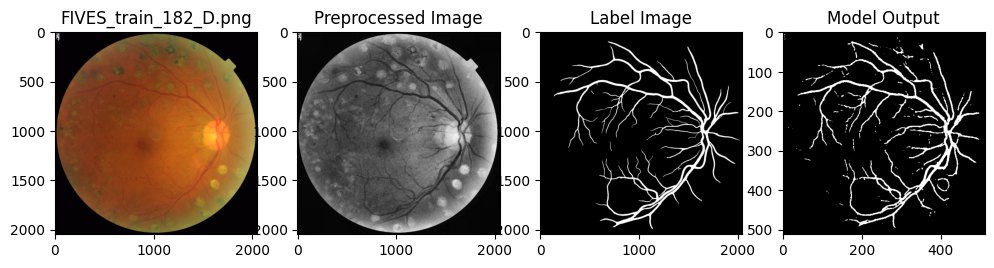

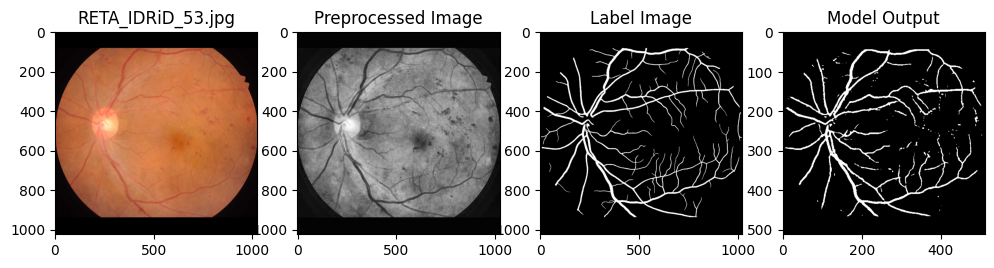

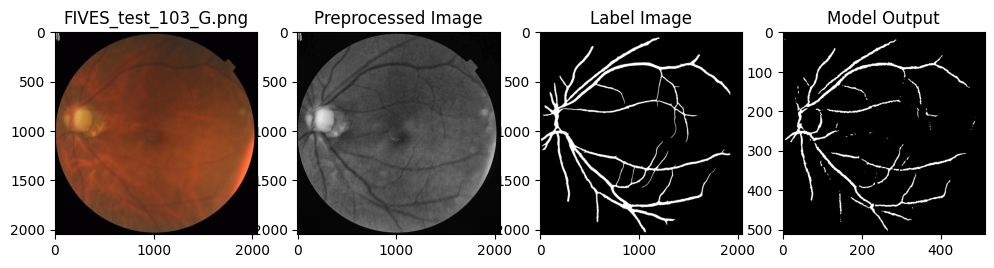

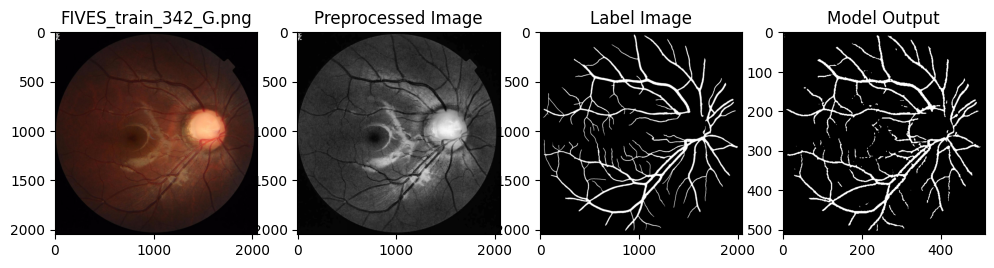

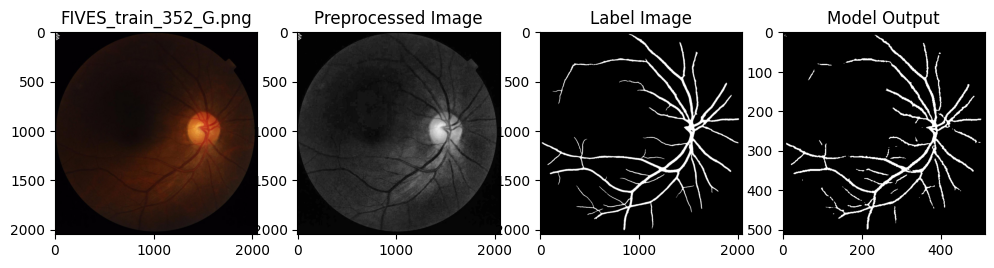

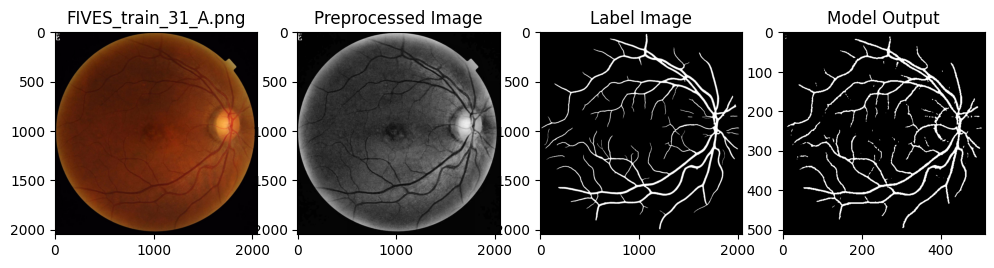

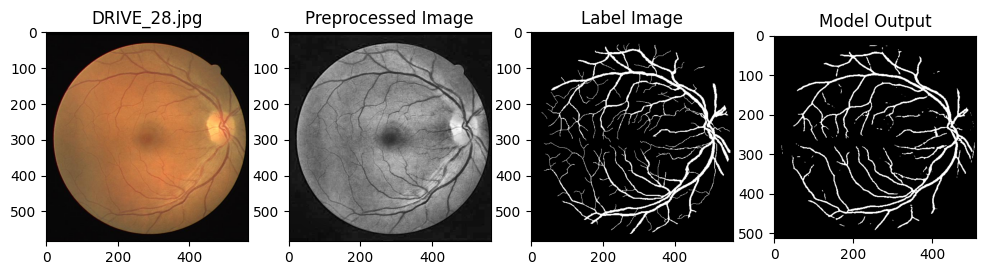

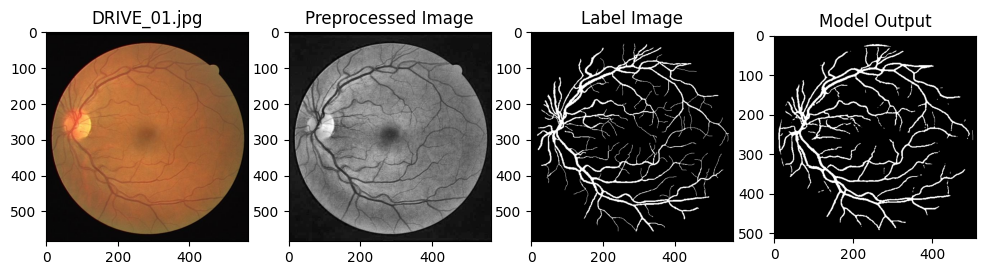

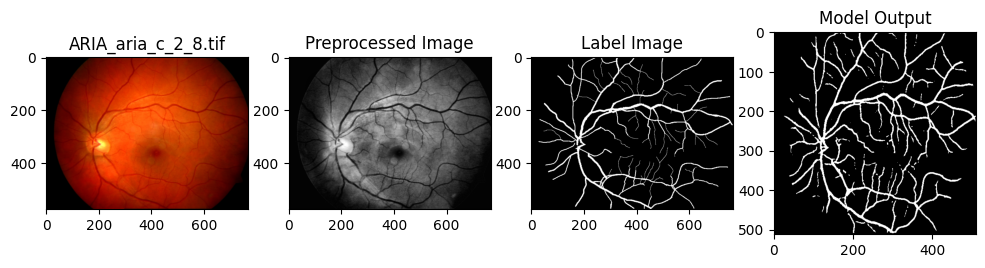

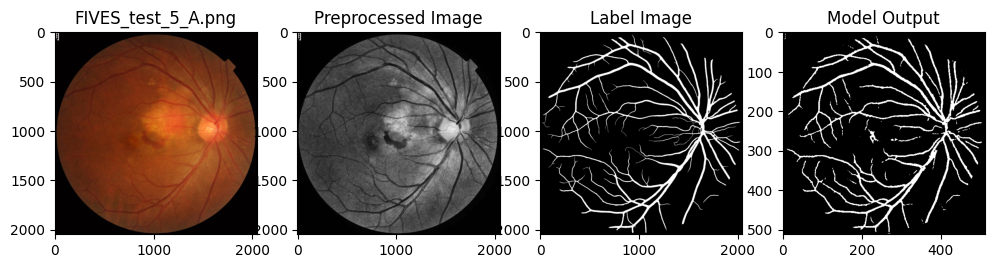

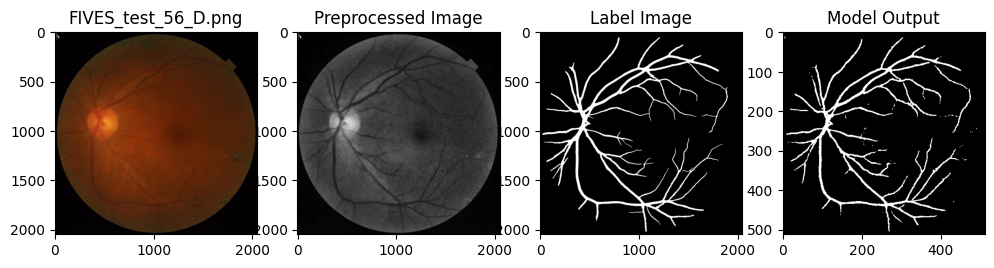

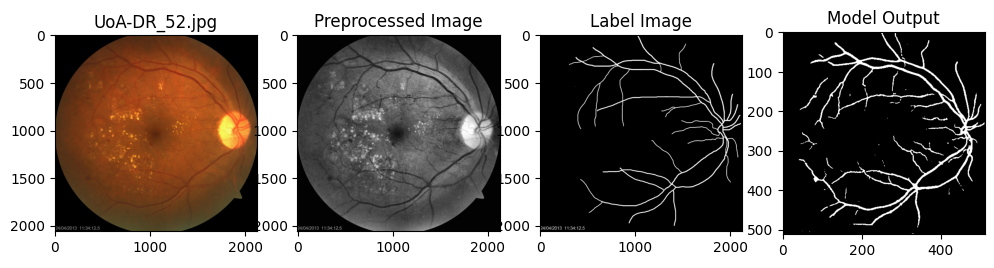

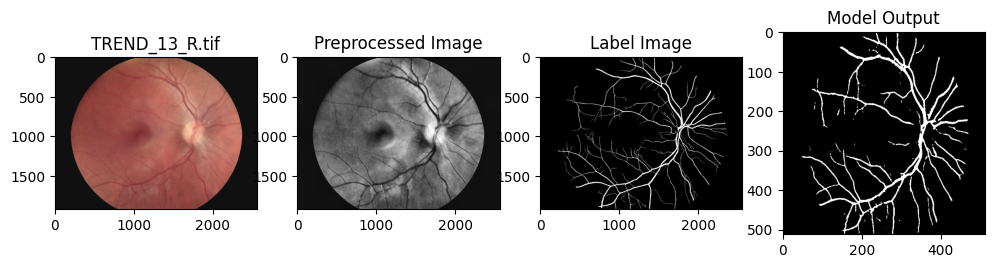

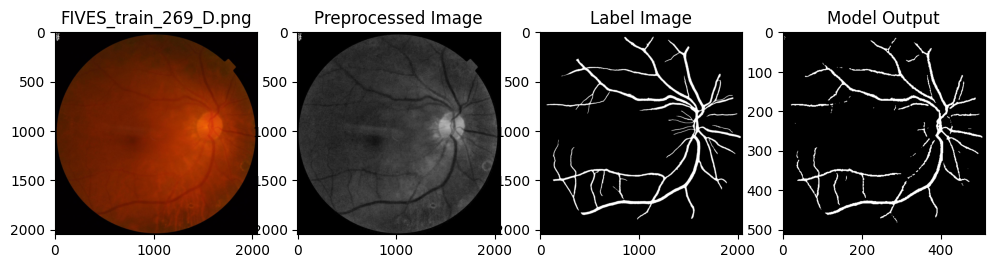

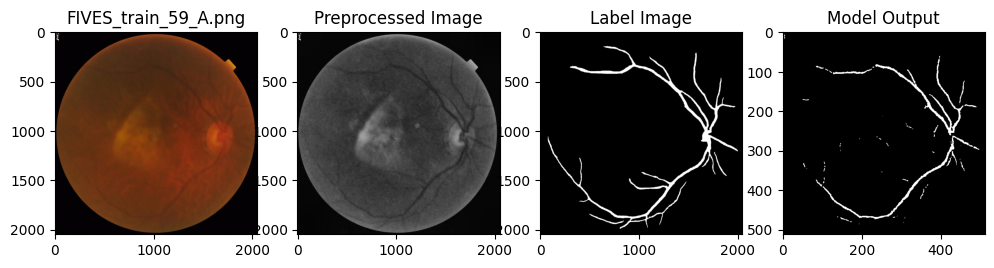

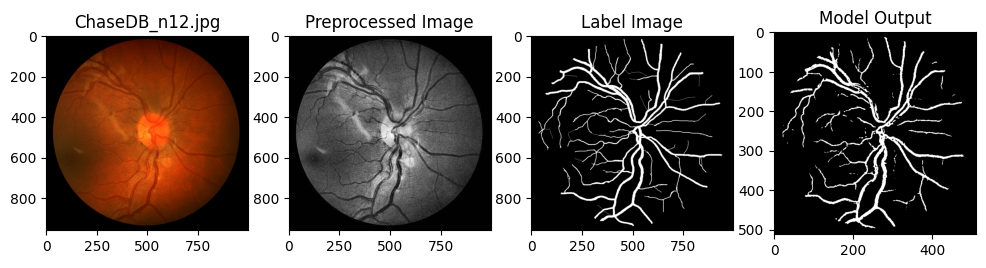

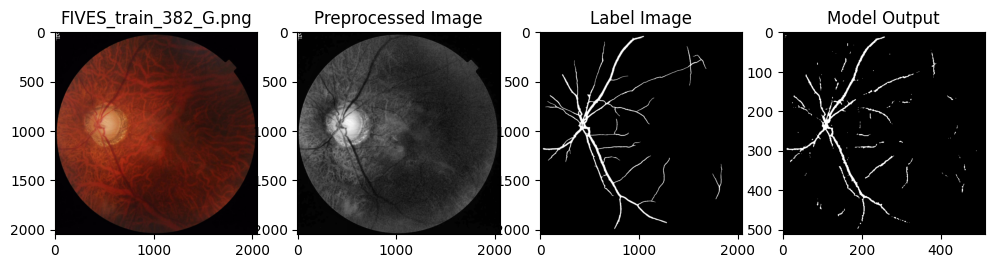

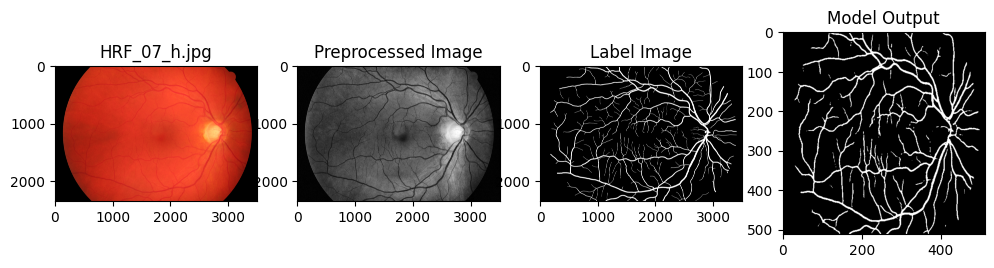

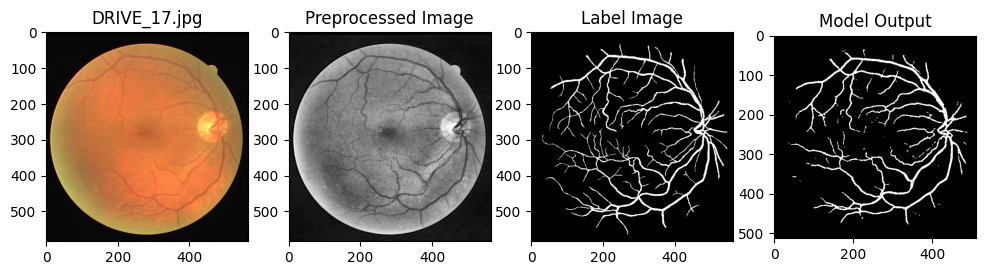

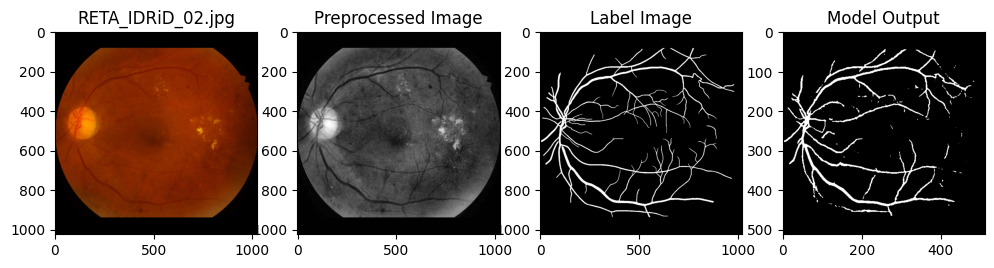

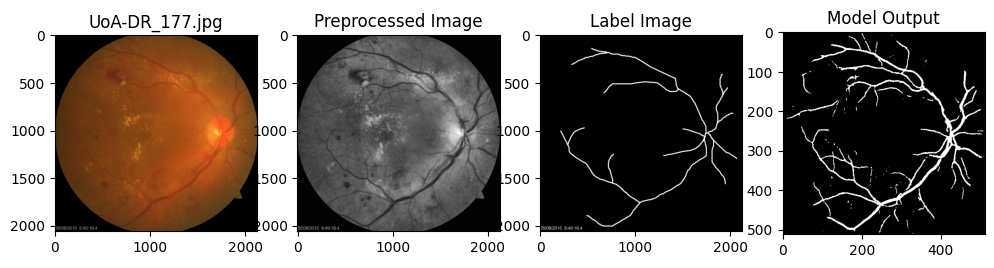

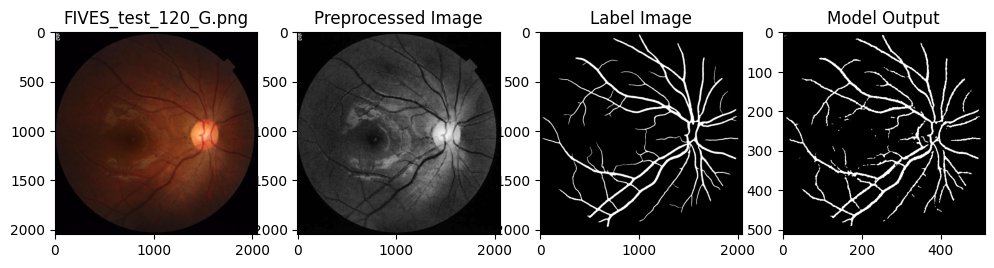

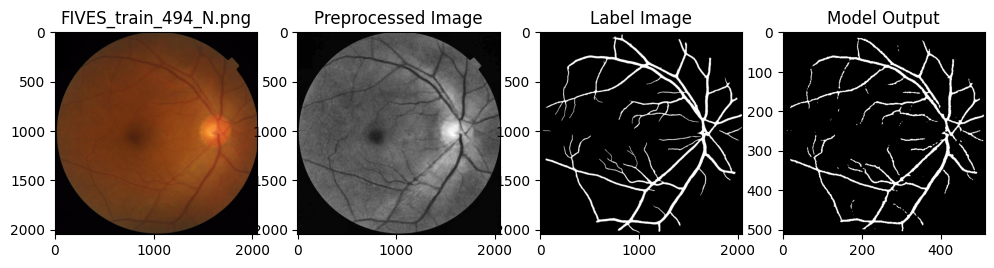

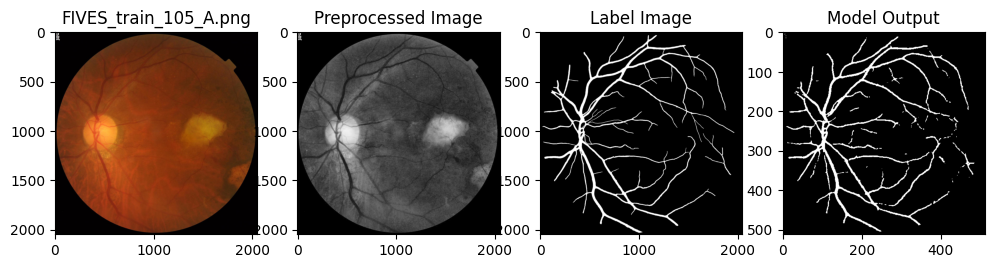

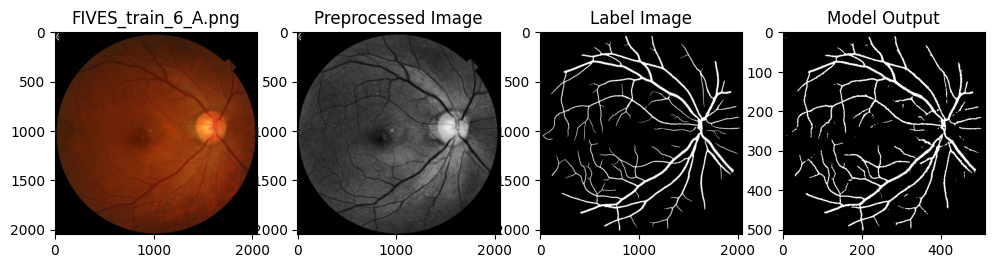

In [2]:
# Plot model result
num_images_to_select = 30
check_result.visualize_FG_result(model, num_images_to_select, SOURCE, INPUT_SHAPE, test_preproc)